In [1]:
from sorting import *

n = [2,8,9,4,7,6,3,5,1]
bubble_sort(n)
print(n)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
list_funcs = [bubble_sort, insertion_sort, merge_sort, quick_sort, selection_sort]


In [3]:
import random

def generate_random_array(debug=False, N=21):
    """Renvoie un tableau contenant toutes les valeurs entières de 0 (inclus)
    à N (exclus) rangées dans un ordre aléatoire

    Args:
        debug (boolean): quand debug est vrai, la fonction renvoie toujours le
                         même tableau afin de simplifier le débogage de vos
                         algorithmes de tri
        N (int): la taille du tableau à renvoyer

    Returns:
        list[int]: un tableau d'entiers, de taille N, non ordonné
    """

    if debug:
        return [3, 9, 7, 1, 6, 2, 8, 4, 5, 0]

    array = list(range(0, N))
    random.shuffle(array)

    return array

def tictoc(list_of_list, func, n):
    import time
    list_of_times = []
    normalized = []
    for lst in list_of_list:
        stock = 0
        for i in range(n):
            start = time.time()
            x = func(lst)
            stop = time.time()
            stock += stop-start
        list_of_times.append(stock/n)
    for time in list_of_times:
        normalized.append(time/tictocref(100000))
    return normalized


    
def tictocref(n):
    import time
    stock = 0
    for i in range(n):
        start = time.time()
        x = 1
        stop = time.time()
        stock += stop-start
    return stock/n

In [4]:
list_of_lists = []
for x in range(100,1001,100):
    list_of_numbers = generate_random_array(N=x)
    list_of_lists.append(list_of_numbers)

In [5]:
def calcul_temps_tri(list_of_functions, list_of_lists_of_numbers, iterations):
    import matplotlib.pyplot as plt
    import math
    fig,ax = plt.subplots(figsize=(5,10))
    for function in list_of_functions:
        list_times = tictoc(list_of_lists_of_numbers, function, iterations)
        ax.plot(range(100,1001,100), list_times, label=f'{function}')
    ax.plot(range(100,1001,100), [x**2 for x in range(100,1001,100)], label='quadratique')
    ax.plot(range(100,1001,100), range(100,1001,100), label='lineaire')
    ax.plot(range(100,1001,100), [x*math.log(x) for x in range(100,1001,100)], label='nlog(n)')
    ax.legend()

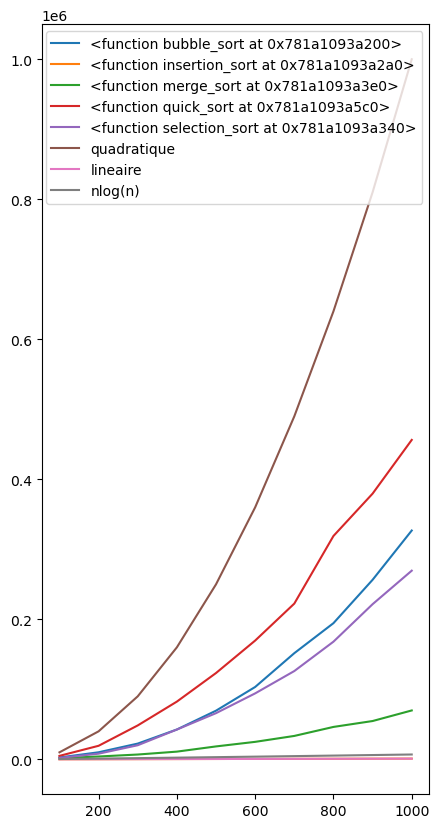

In [6]:
calcul_temps_tri(list_funcs, list_of_lists, 1000)

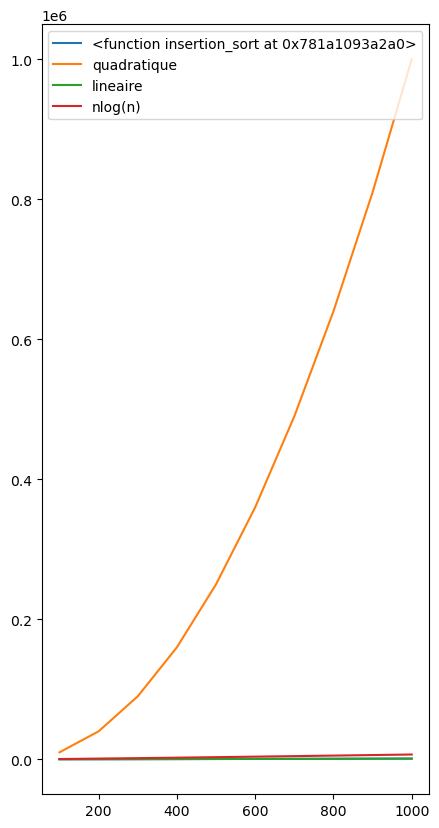

In [7]:
calcul_temps_tri([insertion_sort], list_of_lists, 100000)